<a href="https://colab.research.google.com/github/Jeffrowetull/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

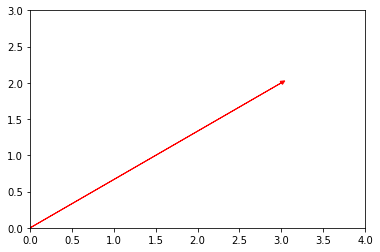

In [81]:
import numpy as np
import matplotlib.pyplot as plt

plt.arrow(0,0, 3,2,head_width=.05, head_length=0.05, color ='red')
plt.xlim(0,4)
plt.ylim(0,3)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [82]:
np.sqrt(17**2+(-4)**2+4+1)

17.60681686165901

The norm is nothing more than the length of a vector

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [83]:
c = [3,7,-2,12]
d = [9,-7,4,6]
np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [84]:
e = [[7,4,2],[1,3,-1],[2,6,-4]]
print(np.linalg.inv(e))
f = np.asarray(e)
print(np.matrix.transpose(f))

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [85]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [86]:
print(df.describe())
print('variance for zero degrees of freedom: \n',df.var(ddof=0))
print('standard deviation for zero degrees of freedom: \n',df.std(ddof=0))

         customers      snow
count     7.000000  7.000000
mean   1135.714286  2.714286
std     314.264069  2.927700
min     760.000000  0.000000
25%     905.000000  0.500000
50%    1080.000000  1.000000
75%    1350.000000  5.000000
max    1600.000000  7.000000
variance for zero degrees of freedom: 
 customers    84653.061224
snow             7.346939
dtype: float64
standard deviation for zero degrees of freedom: 
 customers    290.951991
snow           2.710524
dtype: float64


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

I don't think so. Customers has five digits while snow has one digit. 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [87]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [88]:
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [89]:
# Let me get you some data to start you off.
import pandas as pd

data = {#"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)
cf = pd.DataFrame(data = {"Country": ["England","Wales","Scotland","North Ireland"]})
# Look at the data
df.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [90]:
cf.head()

,Country
0,England
1,Wales
2,Scotland
3,North Ireland


In [91]:
#df.drop('Country',axis=1)
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df)
x

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(data = principal_components,
                           columns = ['principal component 1',
                                     'principal component 2'])
principal_df.head()

,principal component 1,principal component 2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


In [93]:
final_df=pd.concat([principal_df,cf],axis=1)
final_df.head()

,principal component 1,principal component 2,Country
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,North Ireland


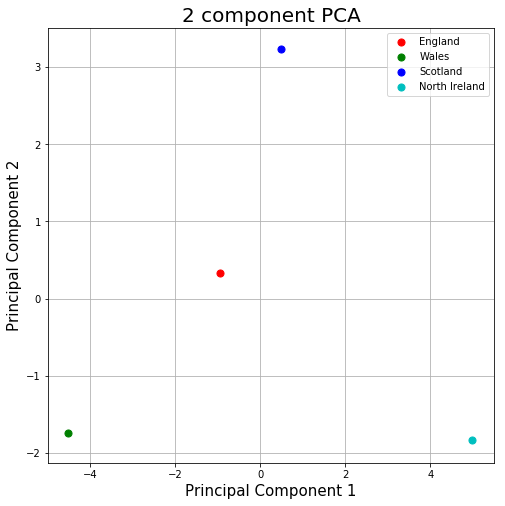

In [94]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['England', 'Wales', 'Scotland','North Ireland']
colors = ['r', 'g', 'b', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['Country'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Not very many points make this graph boring.

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [95]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


##Elbow Method

In [0]:
from sklearn.cluster import KMeans
Sum_of_squared_distances=[]
K = range(1,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(points)
  Sum_of_squared_distances.append(km.inertia_)
  

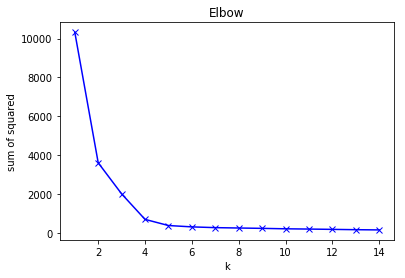

In [97]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum of squared')
plt.title('Elbow')
plt.show()

Two or four?

##Scikit-Learn for 2 clusters

In [98]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(points.values)
labels = kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0]


In [99]:
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,0
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,0
4,-0.804026,-9.704457,0


In [0]:
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()

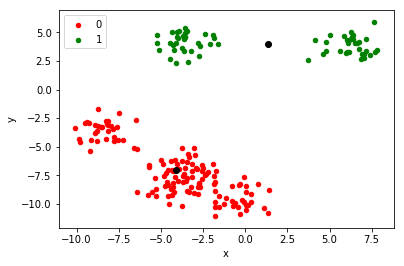

In [103]:

centroids = get_centroids(points,'clusters')

plot_clusters(points,'clusters',centroids)

Ehhhhhhh, green's centroid is between two clusters. Let's try four clusters.

##Scikit-Learn for four clusters

In [112]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(points.values)
labels = kmeans.labels_
print(labels)

[0 2 2 0 2 2 0 0 3 2 2 2 2 2 0 2 0 2 2 1 0 1 1 1 2 2 2 3 2 2 2 2 2 1 2 2 2
 2 3 2 2 1 3 3 3 2 2 2 0 2 1 0 0 3 1 2 2 3 3 0 1 2 0 3 1 3 1 3 0 3 2 2 2 2
 1 1 2 2 3 1 3 2 2 2 3 2 3 2 2 1 3 2 1 2 2 2 2 2 2 2 2 2 0 2 2 1 0 0 0 1 2
 1 2 0 2 2 3 3 1 3 1 2 2 0 2 0 2 1 3 0 2 0 2 0 3 3 2 1 0 2 3 2 2 1 2 3 2 3
 0 2 2 2 0 1 2 3 2 1 2 0 2 2 3 0 1 1 2 3 2 2 0 2 3 1 2 2 2 2 2 0 2 2 2 2 2
 2 0 1 3 2 2 0 1 0 2 3 1 1 2 2]


In [114]:
new_series = pd.Series(labels)
points['clusters'] = new_series.values
points.head()

,x,y,clusters
0,-7.846803,-3.421277,0
1,-3.554323,-6.884729,2
2,-0.192822,-9.671030,2
3,-6.401456,-5.223972,0
4,-0.804026,-9.704457,2


In [0]:
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), 
       df.x[df[column_header]==1].mean(),
       df.x[df[column_header]==2].mean(),
       df.x[df[column_header]==3].mean()]
  y = [df.y[df[column_header]==0].mean(), 
       df.y[df[column_header]==1].mean(), 
       df.y[df[column_header]==2].mean(),
       df.y[df[column_header]==3].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 3:'m'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()

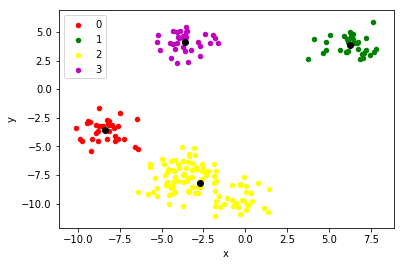

In [119]:
centroids = get_centroids(points,'clusters')
plot_clusters(points,'clusters',centroids)


Four seems like a much better fit than two